In [ ]:
# Python Exploratory Data Analysis - Jaleann M McClurg, MPH

In [71]:
# Import all needed Python Libraries 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV File 
import csv
with open('C:/mydata/nutrition.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(', '.join(row))

FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total, fat,Cholesterol,Fiber,Water,Alcohol,Vitamin, C
167512,"Pillsbury, Golden, Layer, Buttermilk, Biscuits,, Artificial, Flavor,, refrigerated, dough",Baked, Products,307.0, kcal,5.88, g,41.18, g,13.24, g,0.0, mg,1.2, g,35.5, g,,
167513,"Pillsbury,, Cinnamon, Rolls, with, Icing,, refrigerated, dough",Baked, Products,330.0, kcal,4.34, g,53.42, g,11.27, g,0.0, mg,1.4, g,27.86, g,,0.1, mg
167514,"Kraft, Foods,, Shake, N, Bake, Original, Recipe,, Coating, for, Pork,, dry",Baked, Products,377.0, kcal,6.1, g,79.8, g,3.7, g,,,3.2, g,,
167515,"George, Weston, Bakeries,, Thomas, English, Muffins",Baked, Products,232.0, kcal,8.0, g,46.0, g,1.8, g,,,42.6, g,,
167516,"Waffles,, buttermilk,, frozen,, ready-to-heat",Baked, Products,273.0, kcal,6.58, g,41.05, g,9.22, g,15.0, mg,2.2, g,40.34, g,0.0, g,0.0, mg
167517,"Waffle,, buttermilk,, frozen,, ready-to-heat,, toasted",Baked, Products,309.0, kcal,7.42, g,48.39, g,9.49, g,13.0, mg,2.6, g,31.57, g,

In [86]:
# Read CSV File into a Pandas Dataframe 
import pandas as pd
df_food = pd.read_csv ('C:/mydata/nutrition.csv')
print(df_food)

      FDC_ID                                               Item  \
0     167512  Pillsbury Golden Layer Buttermilk Biscuits, Ar...   
1     167513  Pillsbury, Cinnamon Rolls with Icing, refriger...   
2     167514  Kraft Foods, Shake N Bake Original Recipe, Coa...   
3     167515     George Weston Bakeries, Thomas English Muffins   
4     167516         Waffles, buttermilk, frozen, ready-to-heat   
...      ...                                                ...   
7788  175300         Game meat, buffalo, water, cooked, roasted   
7789  175301                                Game meat, elk, raw   
7790  175302                    Game meat, elk, cooked, roasted   
7791  175303                               Game meat, goat, raw   
7792  175304                   Game meat, goat, cooked, roasted   

                           Category    Calories  Protein Carbohydrate  \
0                    Baked Products  307.0 kcal   5.88 g      41.18 g   
1                    Baked Products  330.0 kcal  

In [10]:
# Check Data Frame Data Types 
print(df_food.dtypes)

FDC_ID           int64
Item            object
Category        object
Calories        object
Protein         object
Carbohydrate    object
Total fat       object
Cholesterol     object
Fiber           object
Water           object
Alcohol         object
Vitamin C       object
dtype: object


In [68]:
# Look at Data Set Information - Variable Number of Records and DataTypes 
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FDC_ID        7793 non-null   int64  
 1   Item          7793 non-null   object 
 2   Category      7793 non-null   object 
 3   Calories      7793 non-null   float64
 4   Protein       7793 non-null   object 
 5   Carbohydrate  7793 non-null   object 
 6   Total fat     7793 non-null   object 
 7   Cholesterol   7394 non-null   object 
 8   Fiber         7231 non-null   object 
 9   Water         7793 non-null   object 
 10  Alcohol       5399 non-null   object 
 11  Vitamin C     7332 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 730.7+ KB


In [17]:
# Change Data Type to String
# df_food['Item']=df_food['Item'].astype(str)

In [93]:
#Cleaning the Data

nutrition_data=df_food.copy()
import pandas as pd
# Define the dataframe df_food
nutrition_data = df_food.copy()
# Define a function to convert the nutritional values to numeric and strip units
def convert_to_numeric(column):
    return pd.to_numeric(column.str.extract(r'([\d\.]+)', expand=False))
# Convert nutritional values to numeric
nutrition_data['Calories'] = convert_to_numeric(nutrition_data['Calories'])
nutrition_data['Protein'] = convert_to_numeric(nutrition_data['Protein'])
nutrition_data['Carbohydrate'] = convert_to_numeric(nutrition_data['Carbohydrate'])
nutrition_data['Total fat'] = convert_to_numeric(nutrition_data['Total fat'])
nutrition_data['Cholesterol'] = convert_to_numeric(nutrition_data['Cholesterol'])
nutrition_data['Fiber'] = convert_to_numeric(nutrition_data['Fiber'])
nutrition_data['Water'] = convert_to_numeric(nutrition_data['Water'])
nutrition_data['Alcohol'] = convert_to_numeric(nutrition_data['Alcohol'])
nutrition_data['Vitamin C'] = convert_to_numeric(nutrition_data['Vitamin C'])
# Rename the columns to include units
nutrition_data.rename(columns={
    'Calories': 'Calories_kcal',
    'Protein': 'Protein_g',
    'Carbohydrate': 'Carbohydrate_g',
    'Total fat': 'Total_fat_g',
    'Cholesterol': 'Cholesterol_mg',
    'Fiber': 'Fiber_g',
    'Water': 'Water_g',
    'Alcohol': 'Alcohol_g',
    'Vitamin C': 'Vitamin_C_mg'
}, inplace=True)
# Fill missing values with 0
nutrition_data.fillna(0, inplace=True)
# Display the first few rows of the cleaned dataframe
nutrition_data.head()

,FDC_ID,Item,Category,Calories_kcal,Protein_g,Carbohydrate_g,Total_fat_g,Cholesterol_mg,Fiber_g,Water_g,Alcohol_g,Vitamin_C_mg
0,167512,"Pillsbury Golden Layer Buttermilk Biscuits, Ar...",Baked Products,307.0,5.88,41.18,13.24,0.0,1.2,35.50,0.0,0.0
1,167513,"Pillsbury, Cinnamon Rolls with Icing, refriger...",Baked Products,330.0,4.34,53.42,11.27,0.0,1.4,27.86,0.0,0.1
2,167514,"Kraft Foods, Shake N Bake Original Recipe, Coa...",Baked Products,377.0,6.10,79.80,3.70,0.0,0.0,3.20,0.0,0.0
3,167515,"George Weston Bakeries, Thomas English Muffins",Baked Products,232.0,8.00,46.00,1.80,0.0,0.0,42.60,0.0,0.0
4,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0


In [69]:

# Define a function to detect outliers based on the IQR method
def handle_outliers(column, return_type='count'):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if return_type == 'count':
        return ((column < lower_bound) | (column > upper_bound)).sum()
    elif return_type == 'values':
        return column[(column < lower_bound) | (column > upper_bound)]

# Apply the function to each numeric column and calculate the ratio of outliers
outlier_counts = nutrition_data.select_dtypes(include=['float64']).apply(handle_outliers)
outlier_ratios = outlier_counts / len(nutrition_data)

# Display the ratio of outliers for each column
display(outlier_ratios)

# Get the outliers for Vitamin C, Fiber, and Carbohydrate
vitamin_c_outliers = handle_outliers(nutrition_data['Vitamin_C_mg'], return_type='values')
fiber_outliers = handle_outliers(nutrition_data['Fiber_g'], return_type='values')
carbohydrate_outliers = handle_outliers(nutrition_data['Carbohydrate_g'], return_type='values')

# Create a dataframe to display outliers with their corresponding items and categories
vitamin_c_outliers_df = nutrition_data.loc[vitamin_c_outliers.index, ['Item', 'Category', 'Vitamin_C_mg']]
fiber_outliers_df = nutrition_data.loc[fiber_outliers.index, ['Item', 'Category', 'Fiber_g']]
carbohydrate_outliers_df = nutrition_data.loc[carbohydrate_outliers.index, ['Item', 'Category', 'Carbohydrate_g']]

# Display the top 10 outliers for Vitamin C
display(vitamin_c_outliers_df.sort_values('Vitamin_C_mg', ascending=False).head(10))

Calories_kcal     0.020531
Protein_g         0.005646
Carbohydrate_g    0.094957
Total_fat_g       0.062620
Cholesterol_mg    0.022071
Fiber_g           0.095342
Water_g           0.000000
Alcohol_g         0.009367
Vitamin_C_mg      0.182343
dtype: float64

,Item,Category,Vitamin_C_mg
3449,"Babyfood, GERBER, 2nd Foods, apple, carrot and...",Baby Foods,2732.0
2316,"Beverages, Orange-flavor drink, breakfast type...",Beverages,2400.0
2140,"Beverages, fruit-flavored drink, powder, with ...",Beverages,2400.0
1454,"Peppers, sweet, red, freeze-dried",Vegetables and Vegetable Products,1900.0
5220,"Acerola, (west indian cherry), raw",Fruits and Fruit Juices,1677.6
5221,"Acerola juice, raw",Fruits and Fruit Juices,1600.0
2373,"Beverages, tea, green, instant, decaffeinated,...",Beverages,1342.3
1619,"Chives, freeze-dried",Vegetables and Vegetable Products,660.0
7016,"Spices, coriander leaf, dried",Spices and Herbs,566.7
2139,"Beverages, fruit-flavored drink, dry powdered ...",Beverages,560.0


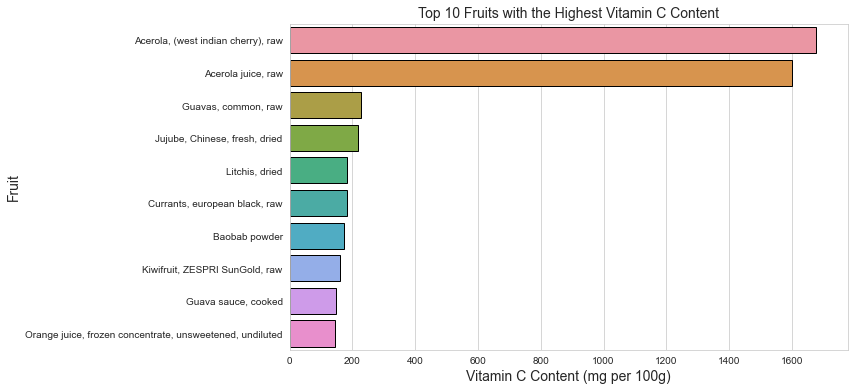

In [84]:
# Filter the dataset for fruits and sort by Vitamin C content
fruits_vitamin_c = nutrition_data[nutrition_data['Category'] == 'Fruits and Fruit Juices']
top_fruits_vitamin_c = fruits_vitamin_c.sort_values('Vitamin_C_mg', ascending=False).head(10)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
sns.set_palette(["#FFA07A"]) 
#Adds grey background to chart
#sns.set_style("darkgrid", {"axes.facecolor": ".5"}) 
 

# Plot the data
plt.figure(figsize=(10, 6))
vitamin_c_plot = sns.barplot(
    x='Vitamin_C_mg', 
    y='Item', 
    data=top_fruits_vitamin_c,
    edgecolor='black'
)

plt.title('Top 10 Fruits with the Highest Vitamin C Content', fontsize=14)
plt.xlabel('Vitamin C Content (mg per 100g)', fontsize=14)
plt.ylabel('Fruit', fontsize=14)
plt.xlim(0, top_fruits_vitamin_c['Vitamin_C_mg'].max() + 100)  # Add some space to the right

# Display the plot
plt.show()

<Figure size 720x432 with 0 Axes>

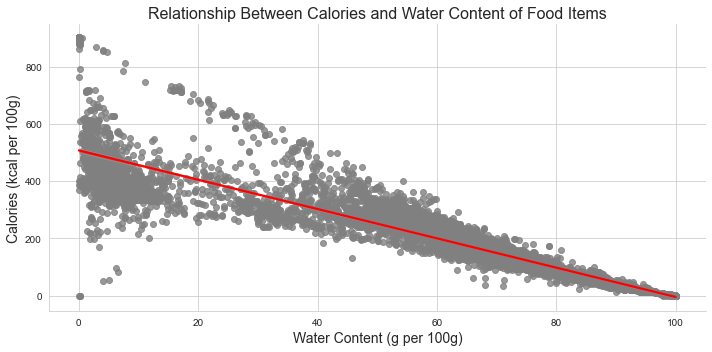

In [98]:
# Plot the relationship between Calories and Water content using lmplot
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Water_g', 
    y='Calories_kcal', 
    data=nutrition_data, 
    scatter_kws={'color': 'gray'},
    line_kws={'color': 'red'},
    aspect=2
)

plt.title('Relationship Between Calories and Water Content of Food Items', fontsize=16)
plt.xlabel('Water Content (g per 100g)', fontsize=14)
plt.ylabel('Calories (kcal per 100g)', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()

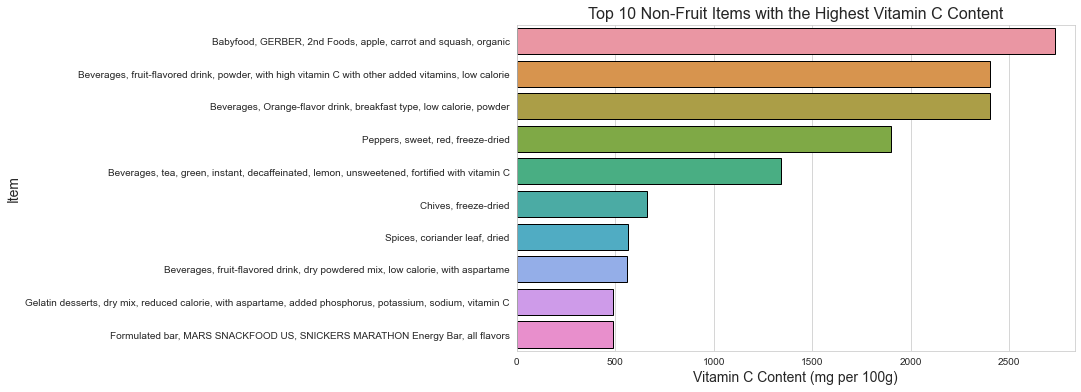

In [99]:
# Filter out the fruits and sort by Vitamin C content
non_fruits_vitamin_c = nutrition_data[nutrition_data['Category'] != 'Fruits and Fruit Juices']
top_non_fruits_vitamin_c = non_fruits_vitamin_c.sort_values('Vitamin_C_mg', ascending=False).head(10)

# Plot the data for the top 10 non-fruit items with the highest Vitamin C content
plt.figure(figsize=(10, 6))
vitamin_c_non_fruits_plot = sns.barplot(
    x='Vitamin_C_mg', 
    y='Item', 
    data=top_non_fruits_vitamin_c,
    edgecolor='black'
)

plt.title('Top 10 Non-Fruit Items with the Highest Vitamin C Content', fontsize=16)
plt.xlabel('Vitamin C Content (mg per 100g)', fontsize=14)
plt.ylabel('Item', fontsize=14)
plt.xlim(0, top_non_fruits_vitamin_c['Vitamin_C_mg'].max() + 100)  # Add some space to the right

# Display the plot
plt.show()